### Lab Assignment 5: Probability in Machine Learning

##### Aim: To understand the role of probability in machine learning by performing probability calculations and basic predictive modeling using the Weather Prediction dataset.

### Task 1: Load and Explore the Dataset

#### 1. Load the Weather Prediction dataset using pandas.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


#### 2. Display dataset characteristics:

##### − Number of records and features

In [3]:
df.shape

(1461, 6)

##### − Data types of features (categorical, numerical)

In [4]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

##### − Summary statistics

In [5]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [6]:
df.median(numeric_only=True)

precipitation     0.0
temp_max         15.6
temp_min          8.3
wind              3.0
dtype: float64

In [7]:
df.var(numeric_only=True)

precipitation    44.624996
temp_max         54.018944
temp_min         25.230571
wind              2.067341
dtype: float64

#### 3. Identify missing values and handle them appropriately.

In [8]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

### Task 2: Probability Calculations

#### 1. Compute the probability of different weather conditions (rain, no rain, cloudy, etc.).

In [31]:
weather_counts = df['weather'].value_counts()
total = len(df)
weather_probability = weather_counts / total 
print('Weather Probability:\n',weather_probability)

Weather Probability:
 weather
rain       0.438741
sun        0.438056
fog        0.069131
drizzle    0.036277
snow       0.017796
Name: count, dtype: float64


In [10]:
mean = df.groupby('weather').mean(numeric_only = True)
print("Mean for each column by weather:")
print(mean)

Mean for each column by weather:
         precipitation   temp_max  temp_min      wind
weather                                              
drizzle       0.000000  15.926415  7.111321  2.367925
fog           0.000000  16.757426  7.979208  2.481188
rain          6.557878  13.454602  7.588768  3.669891
snow          8.553846   5.573077  0.146154  4.411538
sun           0.000000  19.861875  9.343750  2.956406


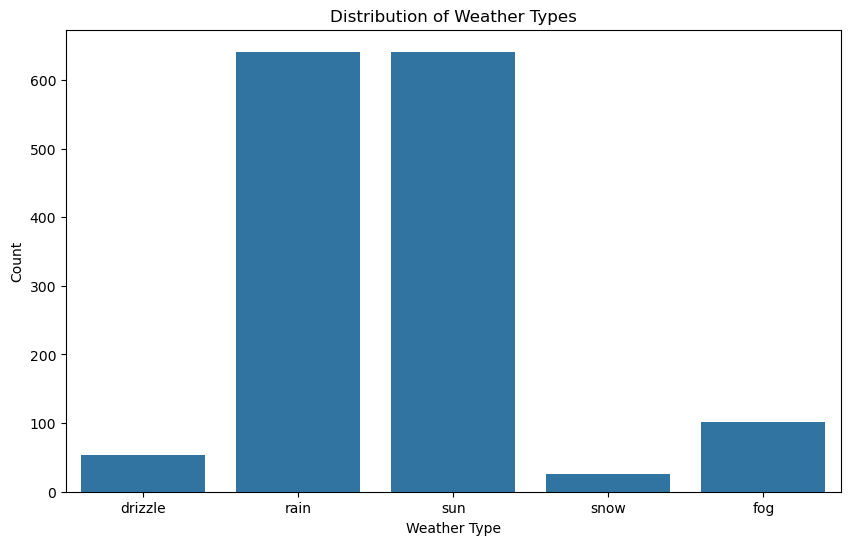

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weather')
plt.title('Distribution of Weather Types')
plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.show()

#### 2. Calculate conditional probabilities (e.g., probability of rain given high humidity).

In [12]:
high_precipitation = df['precipitation'].quantile(0.75)
high_precip_data = df[df['precipitation'] > high_precipitation]
rain_given_high_precip = high_precip_data['weather'].value_counts(normalize=True).get('rain', 0)

print(f"P(rain | high precipitation) = {rain_given_high_precip:.4f}")


P(rain | high precipitation) = 0.9425


#### 3. Apply Bayes' Theorem to predict weather conditions based on given evidence.

In [13]:
rain_data = df[df['weather'] == 'rain']
P_high_wind_given_rain = (rain_data['wind'] > df['wind'].quantile(0.75)).mean()

P_high_wind = (df['wind'] > df['wind'].quantile(0.75)).mean()

P_rain = df['weather'].value_counts(normalize=True).get('rain', 0)

if P_high_wind > 0:
    P_rain_given_high_wind = (P_high_wind_given_rain * P_rain) / P_high_wind
    print(f"P(rain | high wind) = {P_rain_given_high_wind:.4f}")
else:
    print("P(high wind) is zero; unable to calculate posterior probability.")


P(rain | high wind) = 0.6264


### Task 3: Probability Distributions

#### 1. Analyze normal distribution of temperature data.

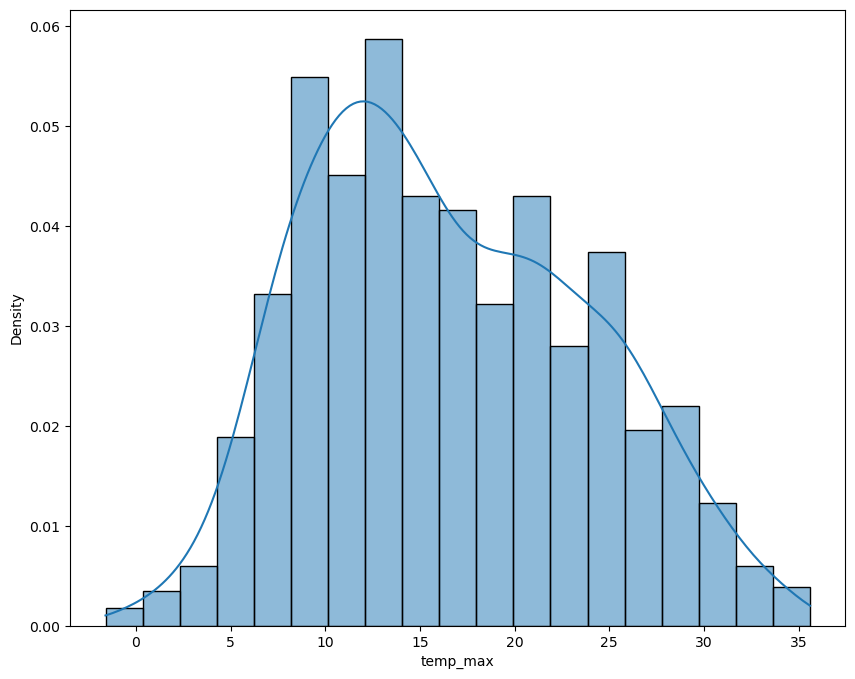

In [32]:
plt.figure(figsize =(10,8))
sns.histplot(df['temp_max'],kde = True,stat = 'density')
plt.show()

In [15]:
from scipy.stats import norm
mean_temp_max = df['temp_max'].mean()
std_temp_max = df['temp_max'].std()

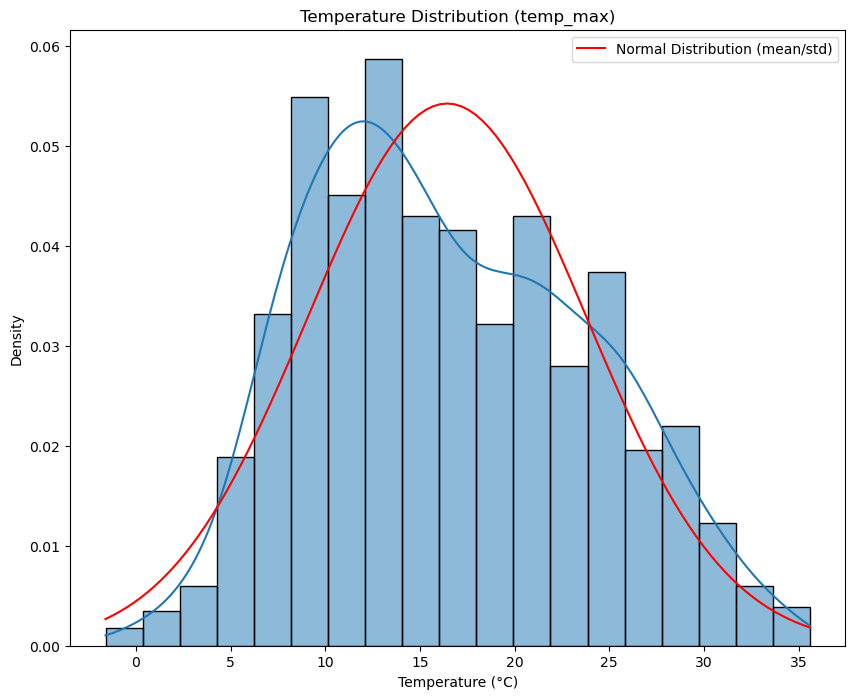

In [16]:
x = np.linspace(df['temp_max'].min(), df['temp_max'].max(), 100)
pdf = norm.pdf(x, mean_temp_max, std_temp_max)
plt.plot(x, pdf, color='red', label="Normal Distribution (mean/std)")

plt.title("Temperature Distribution (temp_max)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Density")
plt.legend()
plt.show()

#### 2. Compute and visualize probability density functions (PDFs) for different weather parameters.

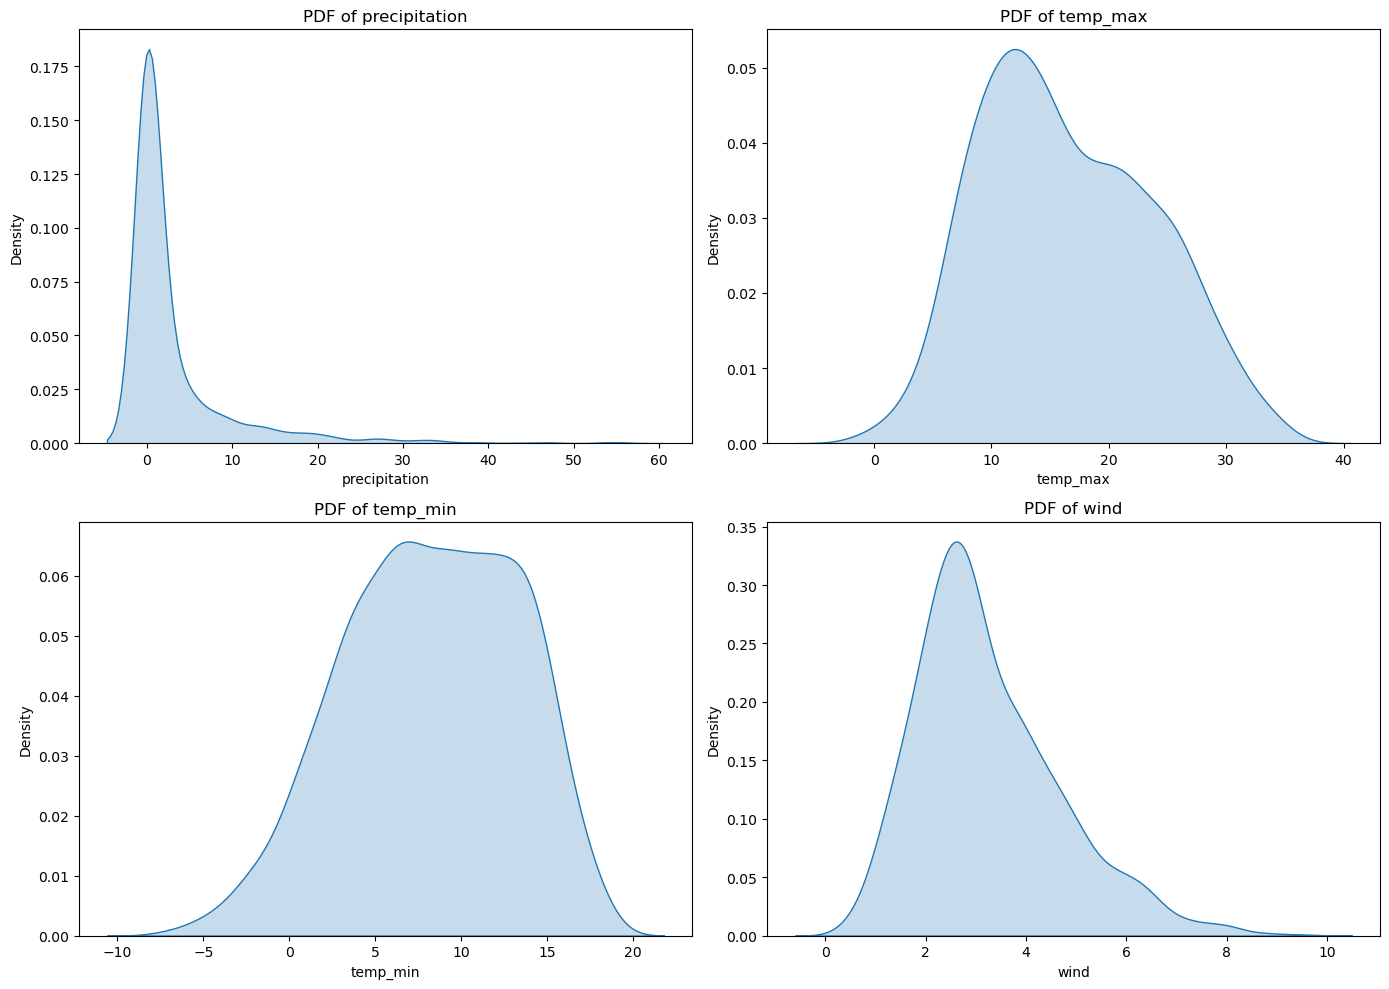

In [34]:
numerical_features = ['precipitation', 'temp_max', 'temp_min', 'wind']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=df, x=feature, fill=True)
    plt.title(f'PDF of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

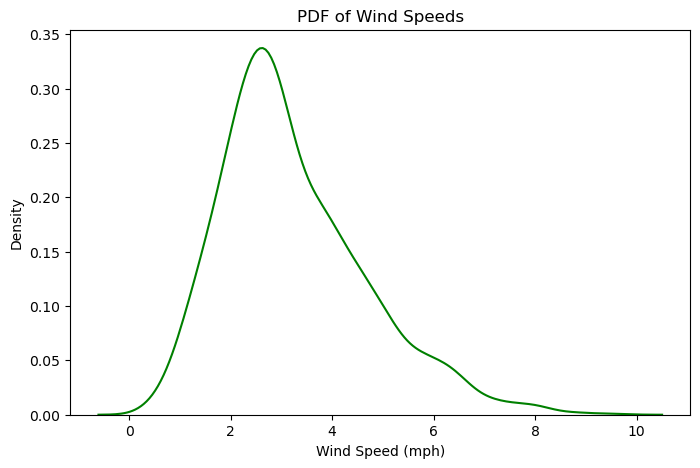

In [17]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['wind'], color='green')
plt.title("PDF of Wind Speeds")
plt.xlabel("Wind Speed (mph)")
plt.show()

#### 3. Generate histograms and kernel density plots to understand feature distributions.

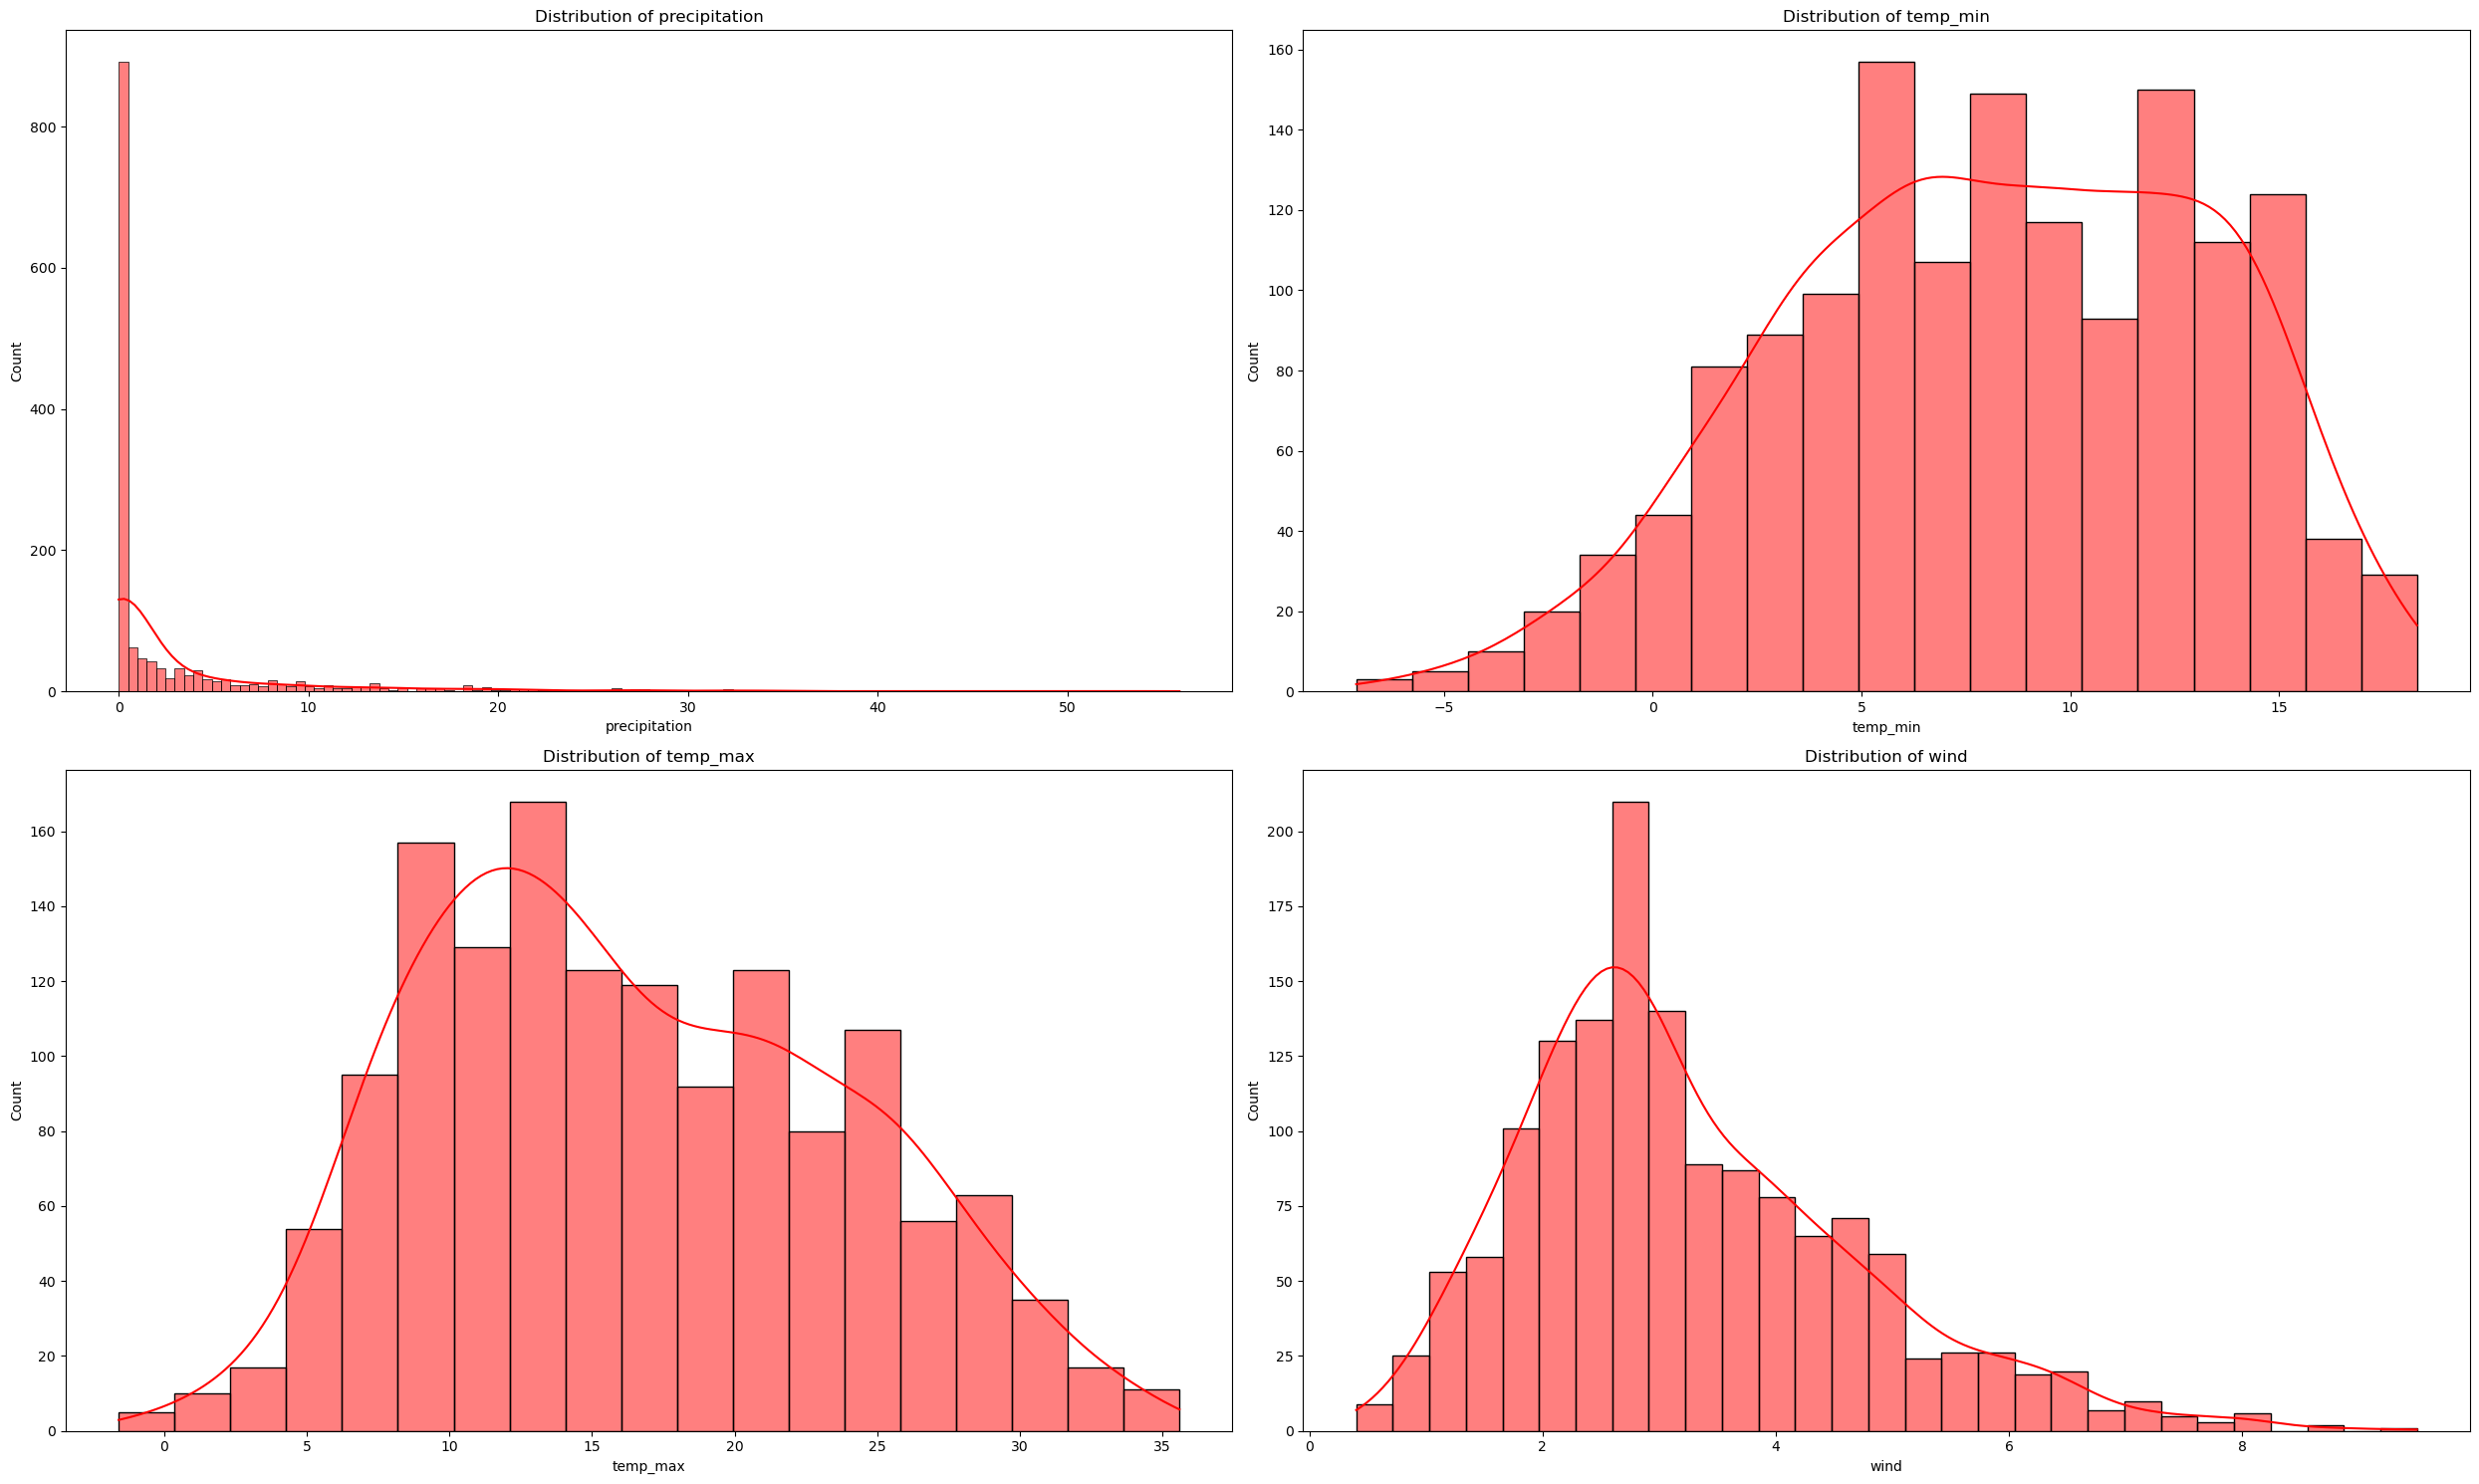

In [18]:
weather_features = ['precipitation', 'temp_min', 'temp_max', 'wind']
plt.figure(figsize=(25, 15))

for i, feature in enumerate(weather_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, color='red')
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

### Task 4: Basic Predictive Modeling

#### 1. Implement a Naïve Bayes classifier to predict whether it will rain or not based on weather conditions.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix, classification_report

In [20]:
df['rain_label'] = (df['weather'] == 'rain').astype(int)
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,rain_label
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1


In [21]:
features = ['precipitation','temp_max','temp_min','wind']
X = df[features]
y = df['rain_label']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [24]:
y_pred = model.predict(X_test)

#### 2. Evaluate the model using:

##### − Accuracy

In [25]:
acc = accuracy_score(y_test,y_pred)
print("Accuracy: " + str(round(acc, 4)))

Accuracy: 0.7859


##### − Precision, Recall, and F1-score

In [26]:
pre = precision_score(y_test,y_pred)
print("Precision: " + str(round(pre,4)))

Precision: 0.8952


In [27]:
recall = recall_score(y_test,y_pred)
print("recall: " + str(round(recall,4)))

recall: 0.5781


In [28]:
f1 = f1_score(y_test, y_pred)
print("f1_score: " + str(round(f1,4)))

f1_score: 0.7025


##### − Confusion matrix

In [29]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[234  13]
 [ 81 111]]


In [30]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       247
           1       0.90      0.58      0.70       192

    accuracy                           0.79       439
   macro avg       0.82      0.76      0.77       439
weighted avg       0.81      0.79      0.78       439

